# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [56]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [57]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

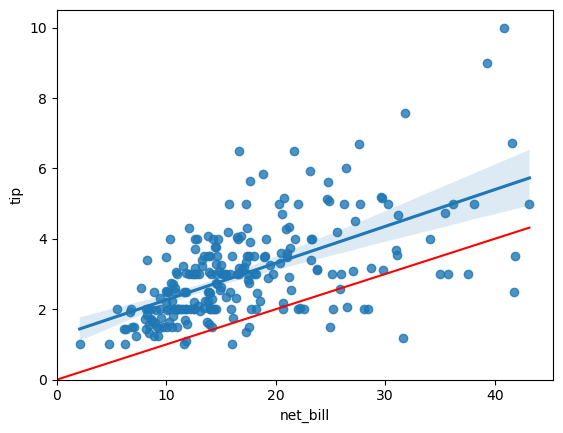

In [58]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [59]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           5.02e-23
Time:                        21:26:47   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

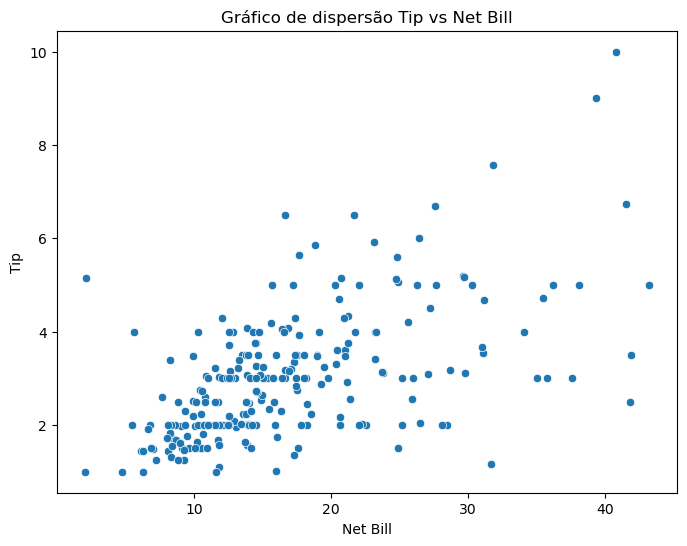

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='net_bill', y='tip', data=tips)
plt.title('Gráfico de dispersão Tip vs Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Tip')
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [61]:
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        21:26:47   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

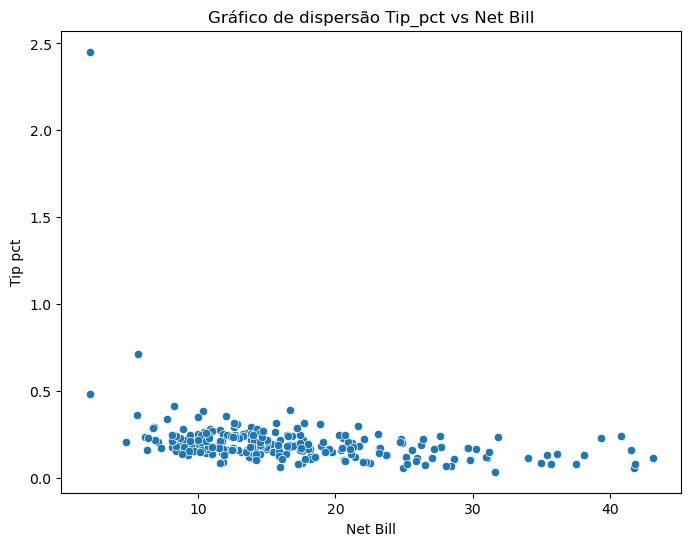

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.title('Gráfico de dispersão Tip_pct vs Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Tip pct')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

### Insights sobre os gráficos acima

- Podemos observar que ambos os gráficos mostram o 'net_bill' (fatura líquida) com uma distribuição bastante dispersa, indicando que os valores variam consideravelmente. No entanto, no segundo gráfico, é possível perceber uma concentração maior de dados em determinadas faixas de valores, sugerindo uma maior densidade de pontos nessa área. Isso pode indicar uma tendência ou padrão nos dados, onde o 'net_bill' está mais frequentemente associado a certos intervalos de gorjetas, enquanto outros intervalos são menos frequentes.
- Outro aspecto importante a ser destacado é a maior concentração de valores da fatura líquida estar entre 10 e 20. Isso indica que a maioria das observações se encontra nessa faixa, sugerindo que a maioria das transações tende a ocorrer dentro desse intervalo de valores. Essa concentração pode refletir um padrão consistente no comportamento dos dados, possivelmente influenciado por fatores externos ou características do grupo analisado.


### Comparação entre os $R^2$

1. Apenas contextualizando, O valor de R-squared (ou 
$R^2$
 ) é uma métrica que quantifica o quão bem o modelo de regressão se ajusta aos dados. Ele mede a proporção da variação na variável dependente (o que estamos tentando prever, por exemplo, tip_pct) que é explicada pela variável independente (nesse caso, net_bill) no modelo de regressão.

   - **Sobre o primeiro gráfico ($R^2$ = 0.333)** = O modelo explica cerca de 33,3% da variação da variável dependente (tip em relação ao net_bill). Isso significa que o modelo tem um desempenho moderado em capturar a relação entre as variáveis. Há uma proporção razoável de variabilidade que o modelo consegue explicar, mas ainda há 66,7% de variação que o modelo não explica.
   - **Sobre o segundo gráfico ($R^2$ = 0.091)** = Aqui, o $R^2$ é bem menor, com apenas 9,1% da variação explicada pelo modelo. Isso indica que o modelo tem pouca capacidade de prever o comportamento da variável dependente a partir da variável independente. A maior parte da variação em tip_pct não está sendo explicada pelo net_bill, o que sugere que pode haver outras variáveis influenciando o percentual de gorjeta ou que a relação entre essas variáveis não é linear.
  
     ### Conclusão:

     - O primeiro modelo tem um ajuste consideravelmente melhor, sugerindo que há uma relação mais clara entre tip e net_bill, enquanto no segundo modelo, a relação entre tip_pct e net_bill é mais fraca e não linear.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [63]:
valores_preditivos = reg.fittedvalues
valores_preditivos

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [64]:
valores_preditivos_tip_pct = reg.fittedvalues
tips['net_bill']

tips['tip'] = valores_preditivos_tip_pct * tips['net_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,3.309254,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,2.186938,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.461450,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.668785,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.699998,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,3.773120,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,3.790751,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,3.684707,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,3.319003,Male,No,Sat,Dinner,2,0.108899,16.07


In [68]:
X = sm.add_constant(tips[['tip_pct', 'net_bill']])
y = tips['tip']

modelo = sm.OLS(y, X).fit()

r2 = modelo.rsquared

print(f"O valor de R^2 é: {r2}")

O valor de R^2 é: 0.3435323062747566


### Insight: Comparação entre valores de $R^2$ 

- Os valores de $R^2$ obtidos foram 0.3435 e 0.333. Esses valores indicam a proporção da variabilidade na variável dependente que é explicada pelo modelo de regressão.
- Valor Atual (0.3435): Este valor sugere que aproximadamente 34.35% da variabilidade na variável dependente tip é explicada pelas variáveis independentes tip_pct e net_bill no modelo atual. Esse é um aumento em relação ao valor anterior.
- Valor Anterior (0.333): No exercício anterior, cerca de 33.3% da variabilidade foi explicada pelo modelo.
- O aumento do $R^2$ de 0.333 para 0.3435 sugere uma pequena melhoria no poder explicativo do modelo. Isso pode indicar que as mudanças feitas no modelo atual (como a inclusão de variáveis adicionais ou ajustes na modelagem) resultaram em uma leve melhoria na explicação da variabilidade dos dados. Embora o aumento não seja muito grande, ele é significativo, pois indica que o modelo está capturando uma proporção maior da variabilidade nos dados em comparação com o modelo anterior.